In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pyodbc

# Establish a connection to the SQL Server database
conn_str = 'mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes'

# con = pyodbc.connect(conn_str)
# if con:
#     print('Yes')

In [4]:
%load_ext sql

In [5]:
# Set the connection string for the %sql magic command
%sql $conn_str

In [6]:
Dim_Sales_Customer_table = %sql select * from dbo.Dim_Sales_Customer
Dim_Sales_Customer_table_df = Dim_Sales_Customer_table.DataFrame()
Dim_Sales_Customer_table_df.head()

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


,customer_id,title,territory_id,customer_modified_date,store_id,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,NumberCarsOwned,CommuteDistance
0,11000,None,9,2014-09-12 11:15:07.263,NaN,4751.05,2001-07-22,1966-04-08,M,75001-100000,M,2.0,0.0,Bachelors,Professional,0.0,1-2 Miles
1,11001,None,9,2014-09-12 11:15:07.263,NaN,2955.92,2001-07-18,1965-05-14,S,50001-75000,M,3.0,3.0,Bachelors,Professional,1.0,0-1 Miles
2,11002,None,9,2014-09-12 11:15:07.263,NaN,89.08,2001-07-10,1965-08-12,M,50001-75000,M,3.0,3.0,Bachelors,Professional,1.0,2-5 Miles
3,11003,None,9,2014-09-12 11:15:07.263,NaN,4719.03,2001-07-01,1968-02-15,S,50001-75000,F,0.0,0.0,Bachelors,Professional,1.0,5-10 Miles
4,11004,None,9,2014-09-12 11:15:07.263,NaN,4691.05,2001-07-26,1968-08-08,S,75001-100000,F,5.0,5.0,Bachelors,Professional,4.0,1-2 Miles


In [7]:
Fact_Sales_table = %sql select * from dbo.Fact_Sales
Fact_Sales_table_df = Fact_Sales_table.DataFrame()
Fact_Sales_table_df.head()

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


,time_id,product_SK,order_id,customer_id,sales_territory_id,store_id,unit_price,tax_amount,sub_total,freight,total_due,order_quantity,line_total,unit_price_discount
0,151,2,43662,29994,6,1418.0,419.4589,2775.1646,28832.5289,867.2389,32474.9324,3.0,1258.376700,0.0000
1,151,2,43663,29565,4,484.0,419.4589,40.2681,419.4589,12.5838,472.3108,1.0,419.458900,0.0000
2,151,2,43668,29614,6,592.0,419.4589,3461.7654,35944.1562,1081.8017,40487.7233,7.0,2936.212300,0.0000
3,151,2,43677,29824,6,1044.0,0.0000,747.1011,0.0000,233.4691,980.5702,4.0,0.000000,0.0000
4,151,2,43678,29889,4,1184.0,-419.4589,942.0740,-9799.9243,294.3981,-8563.4522,1.0,-419.458900,0.0000


In [8]:
Fact_Sales_table_df.isnull().any()

time_id                False
product_SK             False
order_id               False
customer_id            False
sales_territory_id     False
store_id                True
unit_price              True
tax_amount             False
sub_total              False
freight                False
total_due              False
order_quantity          True
line_total             False
unit_price_discount    False
dtype: bool

In [9]:
Fact_Sales_table_df.isnull().sum()

time_id                    0
product_SK                 0
order_id                   0
customer_id                0
sales_territory_id         0
store_id               60398
unit_price                 3
tax_amount                 0
sub_total                  0
freight                    0
total_due                  0
order_quantity            15
line_total                 0
unit_price_discount        0
dtype: int64

In [10]:
%sql select * from Fact_Sales where order_quantity is null

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


time_id,product_SK,order_id,customer_id,sales_territory_id,store_id,unit_price,tax_amount,sub_total,freight,total_due,order_quantity,line_total,unit_price_discount
517,2,43680,29489,4,302,419.4589,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,3,43680,29489,4,302,419.4589,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,4,43680,29489,4,302,874.7940,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,5,43680,29489,4,302,419.4589,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,7,43680,29489,4,302,2146.9620,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,23,43680,29489,4,302,874.7940,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,96,43680,29489,4,302,419.4589,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,115,43680,29489,4,302,183.9382,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,125,43680,29489,4,302,183.9382,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000
517,126,43680,29489,4,302,178.5808,1093.6394,0.0000,341.7623,1435.4017,None,0.000000,0.0000


<Axes: >

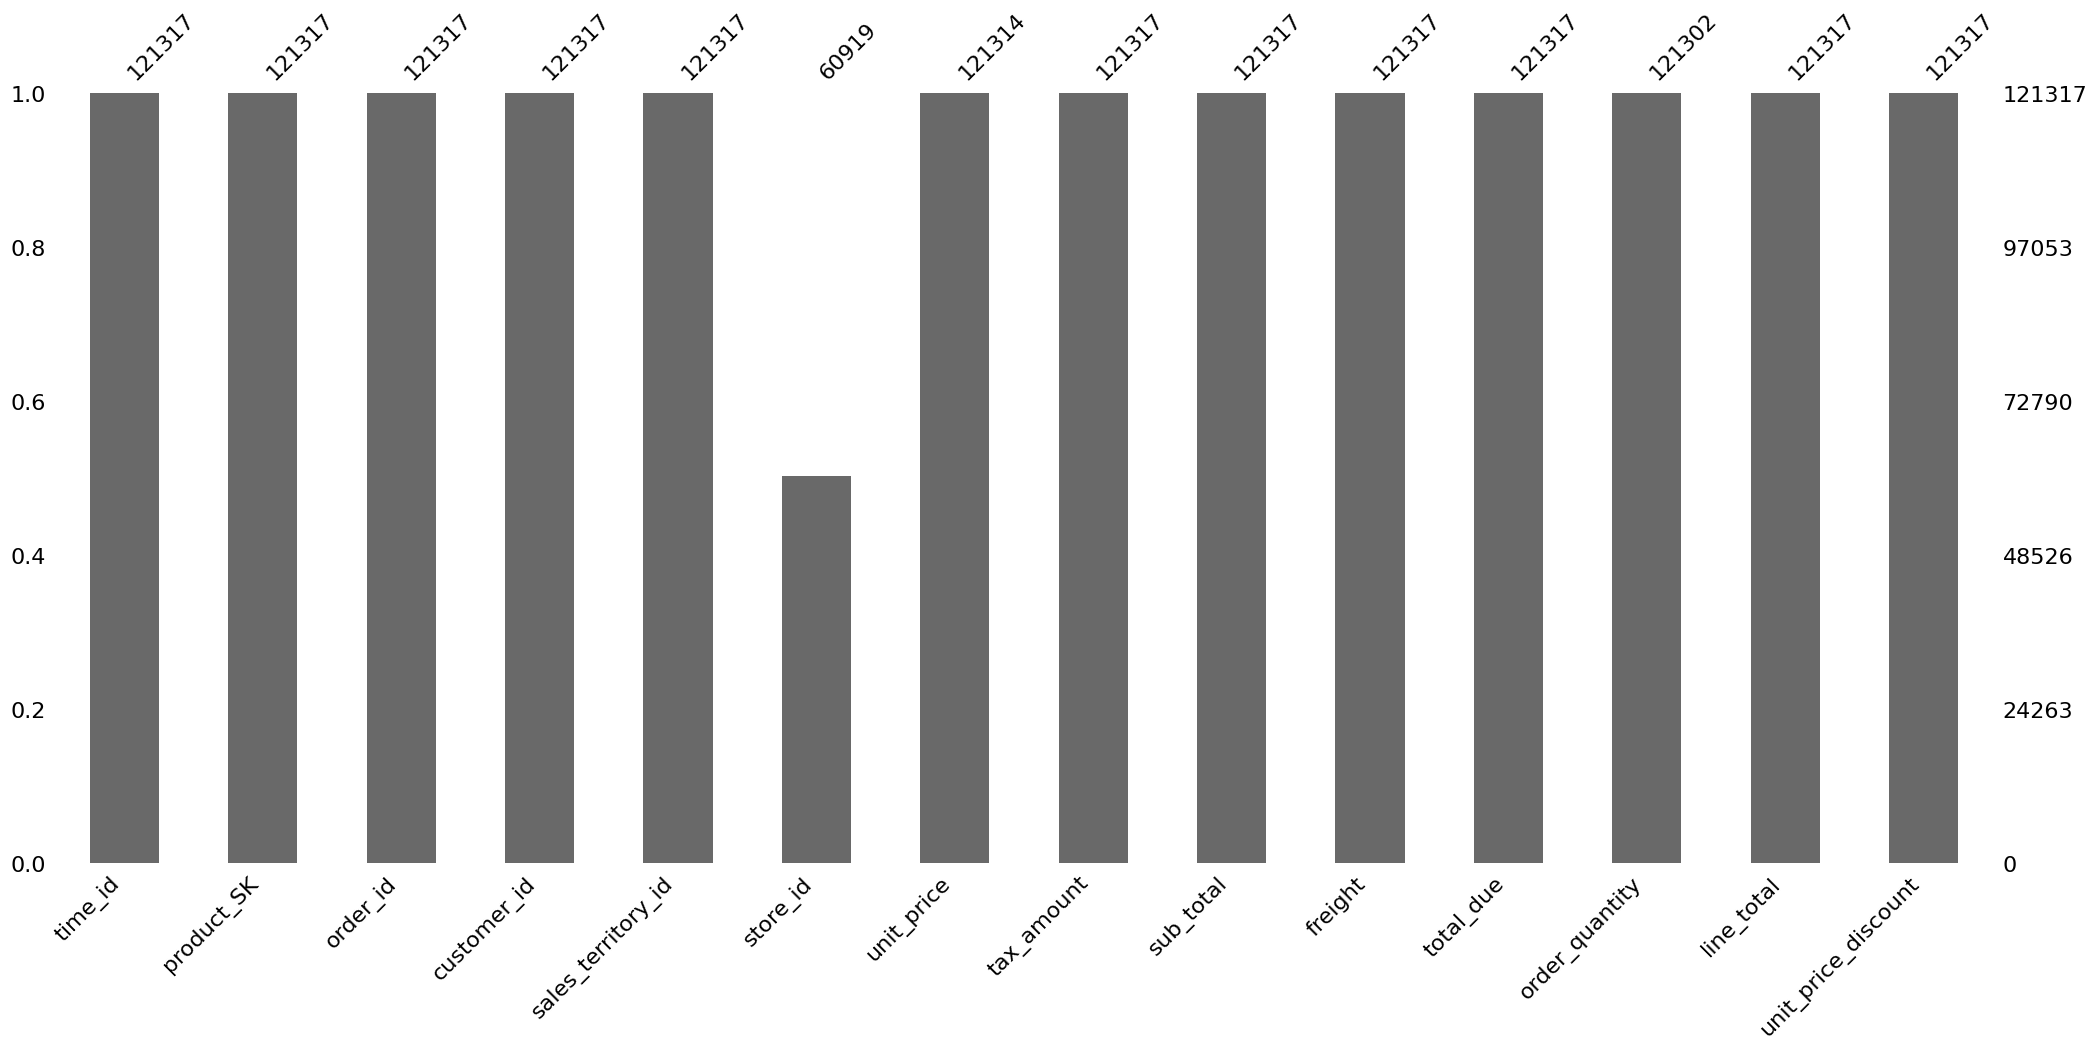

In [11]:
import missingno as msno
msno.bar(Fact_Sales_table_df)

In [12]:
import numpy as np

df_copy = Fact_Sales_table_df.copy()
df_copy['store_id'].replace(np.nan, 'Online', inplace=True)
df_copy.isnull().sum()

time_id                 0
product_SK              0
order_id                0
customer_id             0
sales_territory_id      0
store_id                0
unit_price              3
tax_amount              0
sub_total               0
freight                 0
total_due               0
order_quantity         15
line_total              0
unit_price_discount     0
dtype: int64

<Axes: >

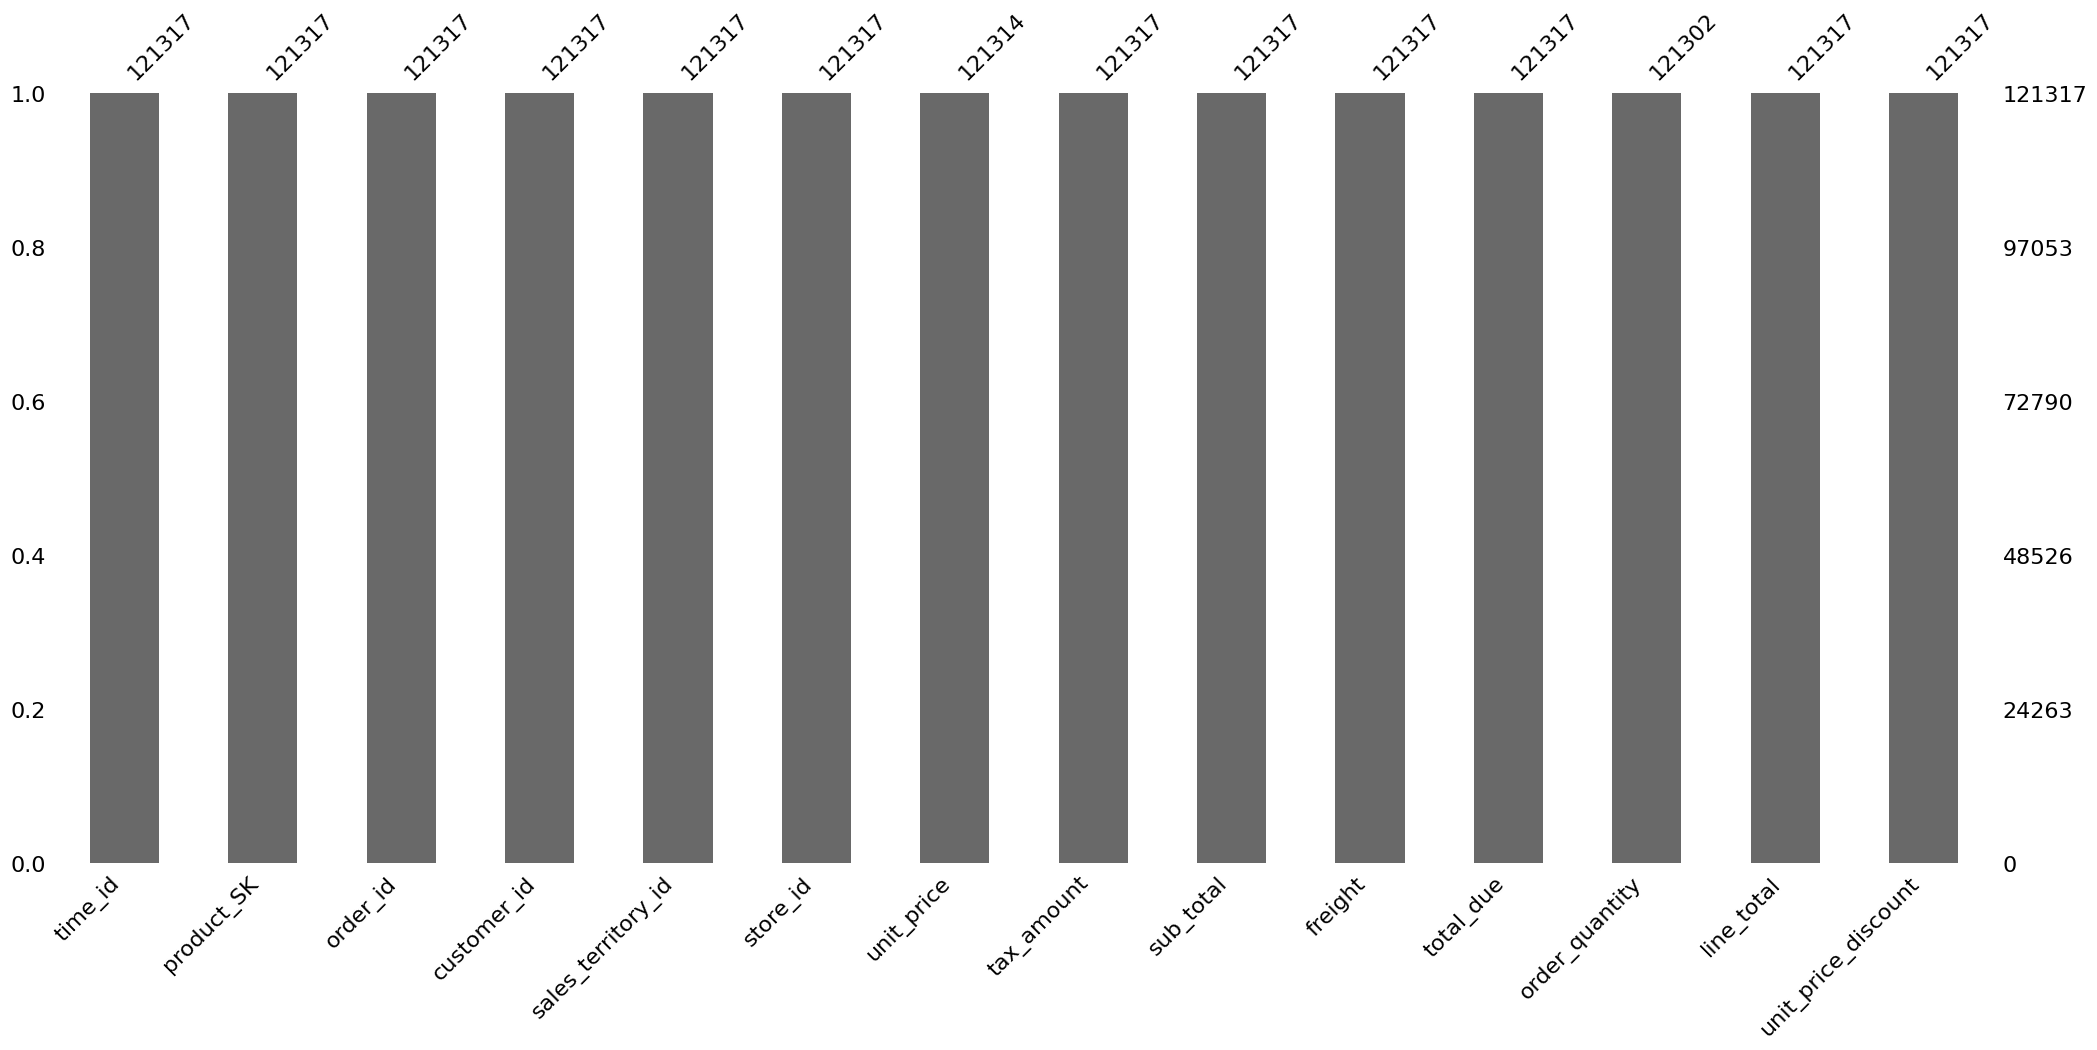

In [13]:
msno.bar(df_copy)

In [14]:
%sql select * from Fact_Sales where unit_price is null

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


time_id,product_SK,order_id,customer_id,sales_territory_id,store_id,unit_price,tax_amount,sub_total,freight,total_due,order_quantity,line_total,unit_price_discount
151,2,43679,29761,6,908,None,125.8032,0.0000,39.3135,165.1167,1,0.000000,0.0000
151,88,43679,29761,6,908,None,125.8032,0.0000,39.3135,165.1167,2,0.000000,0.0000
151,263,43679,29761,6,908,None,125.8032,0.0000,39.3135,165.1167,2,0.000000,0.0000


In [15]:
mean_price = Fact_Sales_table_df['unit_price'].mean()
mode_price = Fact_Sales_table_df['unit_price'].mode()[0]
median_price = Fact_Sales_table_df['unit_price'].median()
print('mean price:', mean_price)
print('mode_price: ', mode_price)
print('median_price: ', median_price)

mean price: 464.94057262805615
mode_price:  4.9900
median_price:  49.99


In [16]:
Fact_Sales_table_df['unit_price'].describe()

count     121314
unique       296
top       4.9900
freq        8827
Name: unit_price, dtype: object

In [17]:
df_copy['unit_price'].fillna(median_price, inplace=True)
df_copy.isnull().sum()

time_id                 0
product_SK              0
order_id                0
customer_id             0
sales_territory_id      0
store_id                0
unit_price              0
tax_amount              0
sub_total               0
freight                 0
total_due               0
order_quantity         15
line_total              0
unit_price_discount     0
dtype: int64

In [18]:
df_copy.dtypes

time_id                  int64
product_SK               int64
order_id                 int64
customer_id              int64
sales_territory_id       int64
store_id                object
unit_price              object
tax_amount              object
sub_total               object
freight                 object
total_due               object
order_quantity         float64
line_total              object
unit_price_discount     object
dtype: object

In [19]:
# Convert the necessary columns to numeric types
cols_to_convert = ['unit_price', 'tax_amount', 'sub_total', 'freight', 'total_due', 'line_total', 'unit_price_discount']
for col in cols_to_convert:
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# Now you can perform your calculation
indices = df_copy[df_copy['unit_price'].isnull()].index
df_copy.loc[indices, 'line_total'] = df_copy.loc[indices, 'unit_price'] * (1 - df_copy.loc[indices, 'unit_price_discount']) * df_copy.loc[indices, 'order_quantity']


<Axes: >

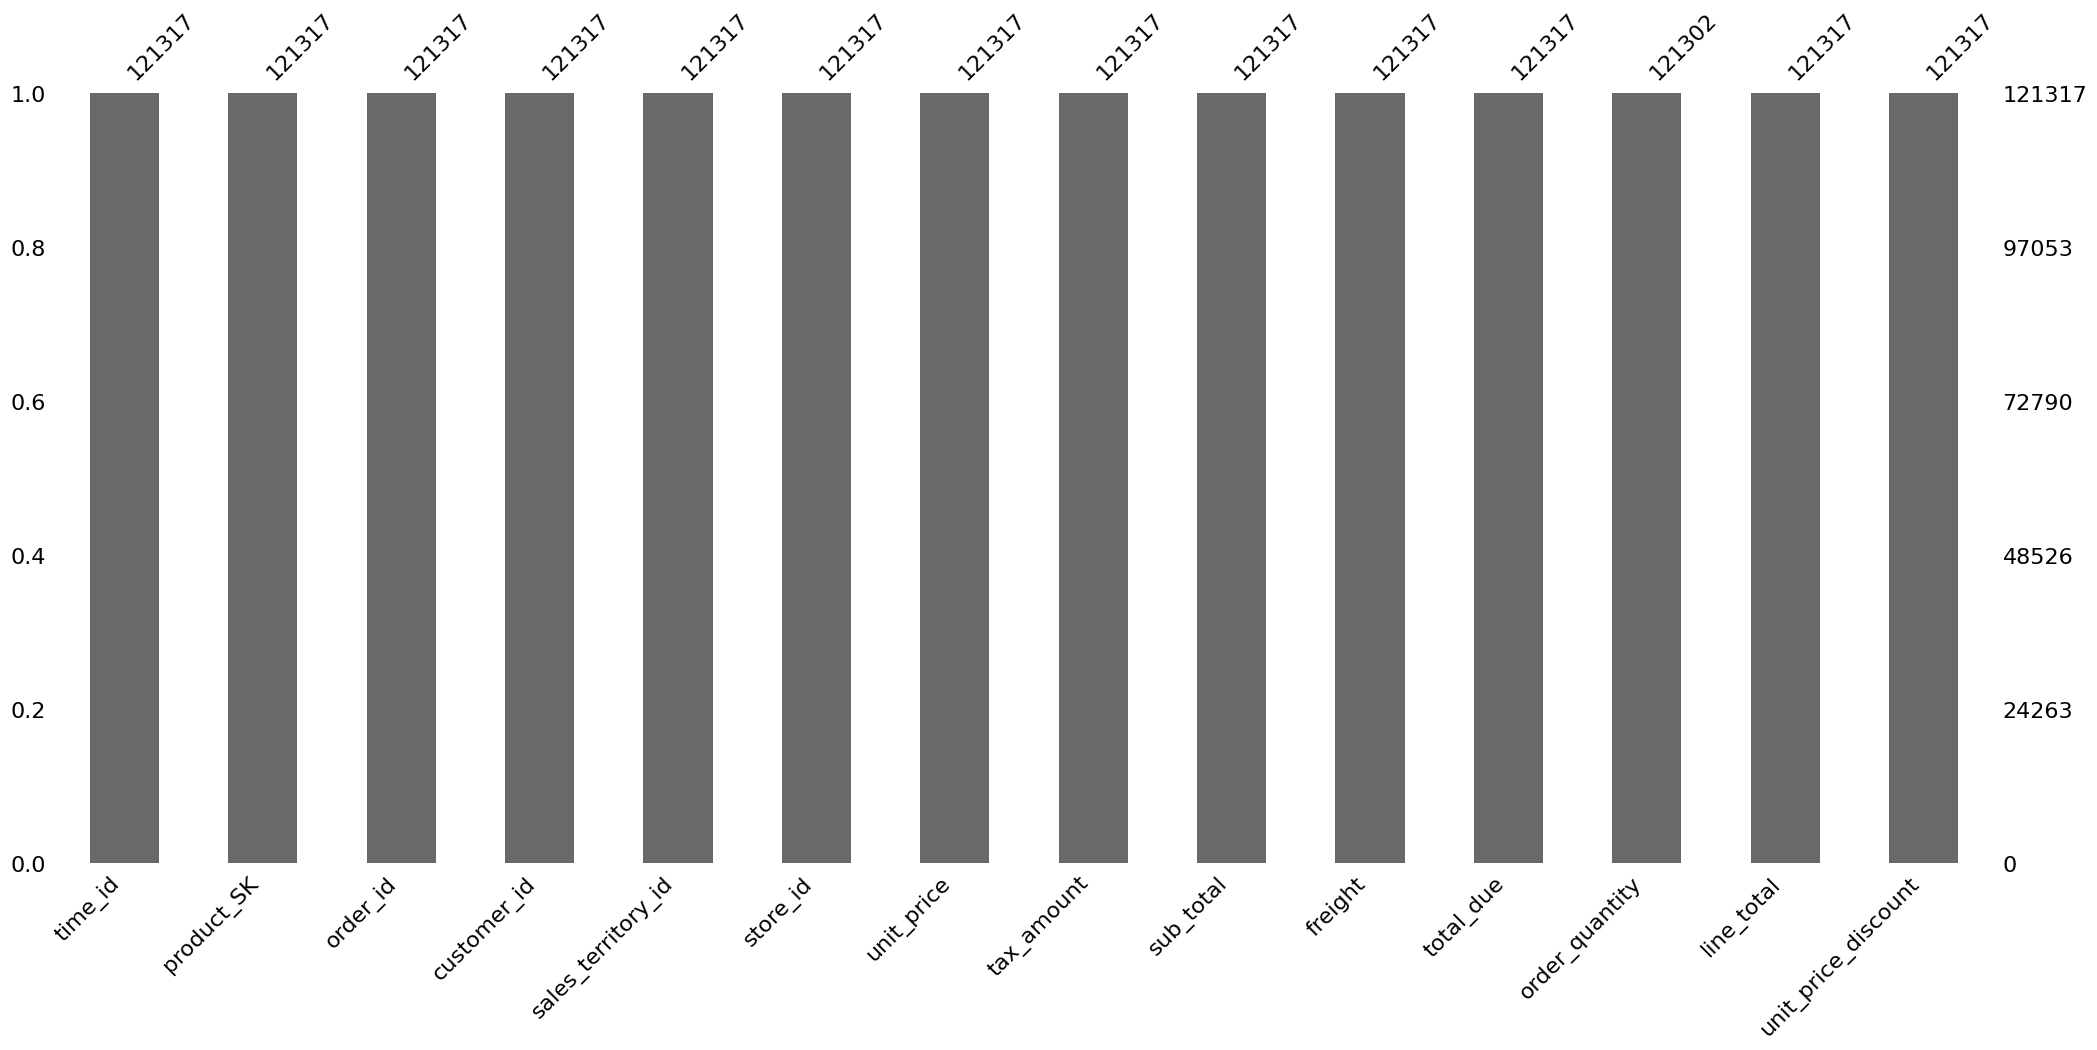

In [20]:
msno.bar(df_copy)

In [21]:
df_copy['order_quantity'].isnull().sum()

15

In [22]:
null_order_quantity = df_copy[df_copy['order_quantity'].isnull()].index
df_copy.iloc[null_order_quantity]


,time_id,product_SK,order_id,customer_id,sales_territory_id,store_id,unit_price,tax_amount,sub_total,freight,total_due,order_quantity,line_total,unit_price_discount
12360,517,2,43680,29489,4,302.0,419.4589,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12362,517,3,43680,29489,4,302.0,419.4589,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12365,517,4,43680,29489,4,302.0,874.7940,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12367,517,5,43680,29489,4,302.0,419.4589,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12368,517,7,43680,29489,4,302.0,2146.9620,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12372,517,23,43680,29489,4,302.0,874.7940,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12378,517,96,43680,29489,4,302.0,419.4589,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12380,517,115,43680,29489,4,302.0,183.9382,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12382,517,125,43680,29489,4,302.0,183.9382,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0
12384,517,126,43680,29489,4,302.0,178.5808,1093.6394,0.0,341.7623,1435.4017,NaN,0.0,0.0


In [23]:
# Drop the rows where 'order_quantity' is null
df_copy = df_copy.dropna(subset=['order_quantity'])

In [24]:
df_copy.isnull().sum()

time_id                0
product_SK             0
order_id               0
customer_id            0
sales_territory_id     0
store_id               0
unit_price             0
tax_amount             0
sub_total              0
freight                0
total_due              0
order_quantity         0
line_total             0
unit_price_discount    0
dtype: int64

In [25]:
df_copy.describe()

,time_id,product_SK,order_id,customer_id,sales_territory_id,unit_price,tax_amount,sub_total,freight,total_due,order_quantity,line_total,unit_price_discount
count,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000,121302.000000
mean,927.982251,183.623881,57829.113222,24344.994485,5.411576,464.936565,2075.751963,21397.020131,648.672501,24121.444595,2.265618,905.052974,0.002826
std,265.339525,102.729468,9008.331115,6689.279415,2.835866,751.968728,2795.860295,28514.983368,873.706335,32179.299392,2.491697,1693.622259,0.024812
min,151.000000,1.000000,43659.000000,11000.000000,1.000000,-874.794000,0.109900,-9799.924300,0.034400,-8563.452200,-2.000000,-1749.588000,0.000000
25%,790.000000,75.000000,49884.000000,18176.250000,4.000000,21.490000,45.237600,564.210000,14.136800,623.750400,1.000000,24.990000,0.000000
50%,1004.000000,238.000000,57029.000000,29485.000000,6.000000,49.990000,205.112800,2514.930000,64.097800,2782.666300,1.000000,132.246000,0.000000
75%,1127.000000,275.000000,65491.750000,29795.000000,8.000000,602.346000,3598.309200,37202.781200,1124.471600,41890.970300,3.000000,1120.490000,0.000000
max,1277.000000,295.000000,75123.000000,30118.000000,10.000000,3578.270000,17948.518600,163930.394300,5608.912100,187487.825000,44.000000,27893.619000,0.400000


In [26]:
print(df_copy.dtypes)

time_id                  int64
product_SK               int64
order_id                 int64
customer_id              int64
sales_territory_id       int64
store_id                object
unit_price             float64
tax_amount             float64
sub_total              float64
freight                float64
total_due              float64
order_quantity         float64
line_total             float64
unit_price_discount    float64
dtype: object


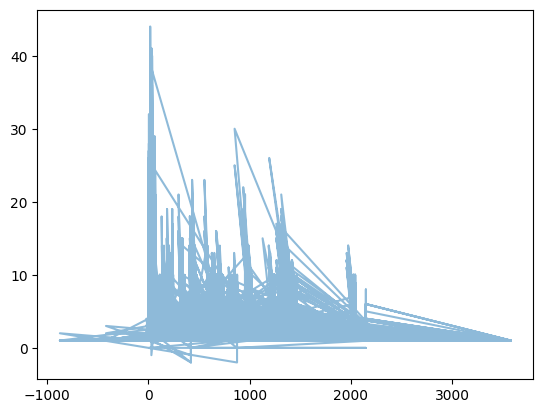

In [28]:
import matplotlib.pyplot as plt
x = df_copy['unit_price']
y = df_copy['order_quantity']
plt.plot(x, y, alpha=0.5)
plt.show()

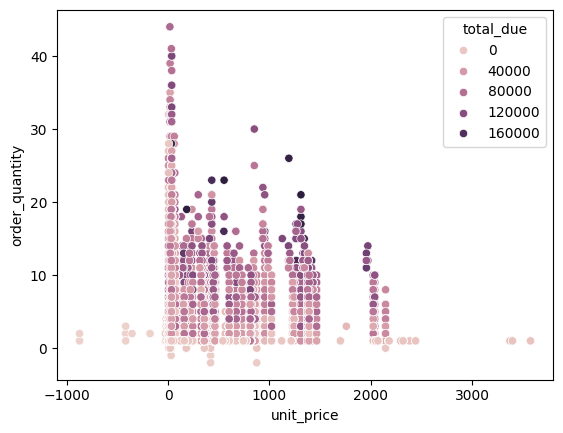

In [29]:
import seaborn as sns

sns.scatterplot(data = df_copy, x = 'unit_price', y = 'order_quantity', hue = 'total_due')
plt.show()


In [ ]:
z = df_copy['line_total']
t = df_copy['unit_price_discount']

## Handle the Dim_Sales_Customer table

In [30]:
Dim_Sales_Customer_table_df.isnull().sum()

customer_id                   0
title                     18388
territory_id                  0
customer_modified_date        0
store_id                  18484
TotalPurchaseYTD              0
DateFirstPurchase           635
BirthDate                   635
MaritalStatus               635
YearlyIncome                635
Gender                      635
TotalChildren               635
NumberChildrenAtHome        635
Education                   635
Occupation                  635
NumberCarsOwned             635
CommuteDistance             635
dtype: int64

<Axes: >

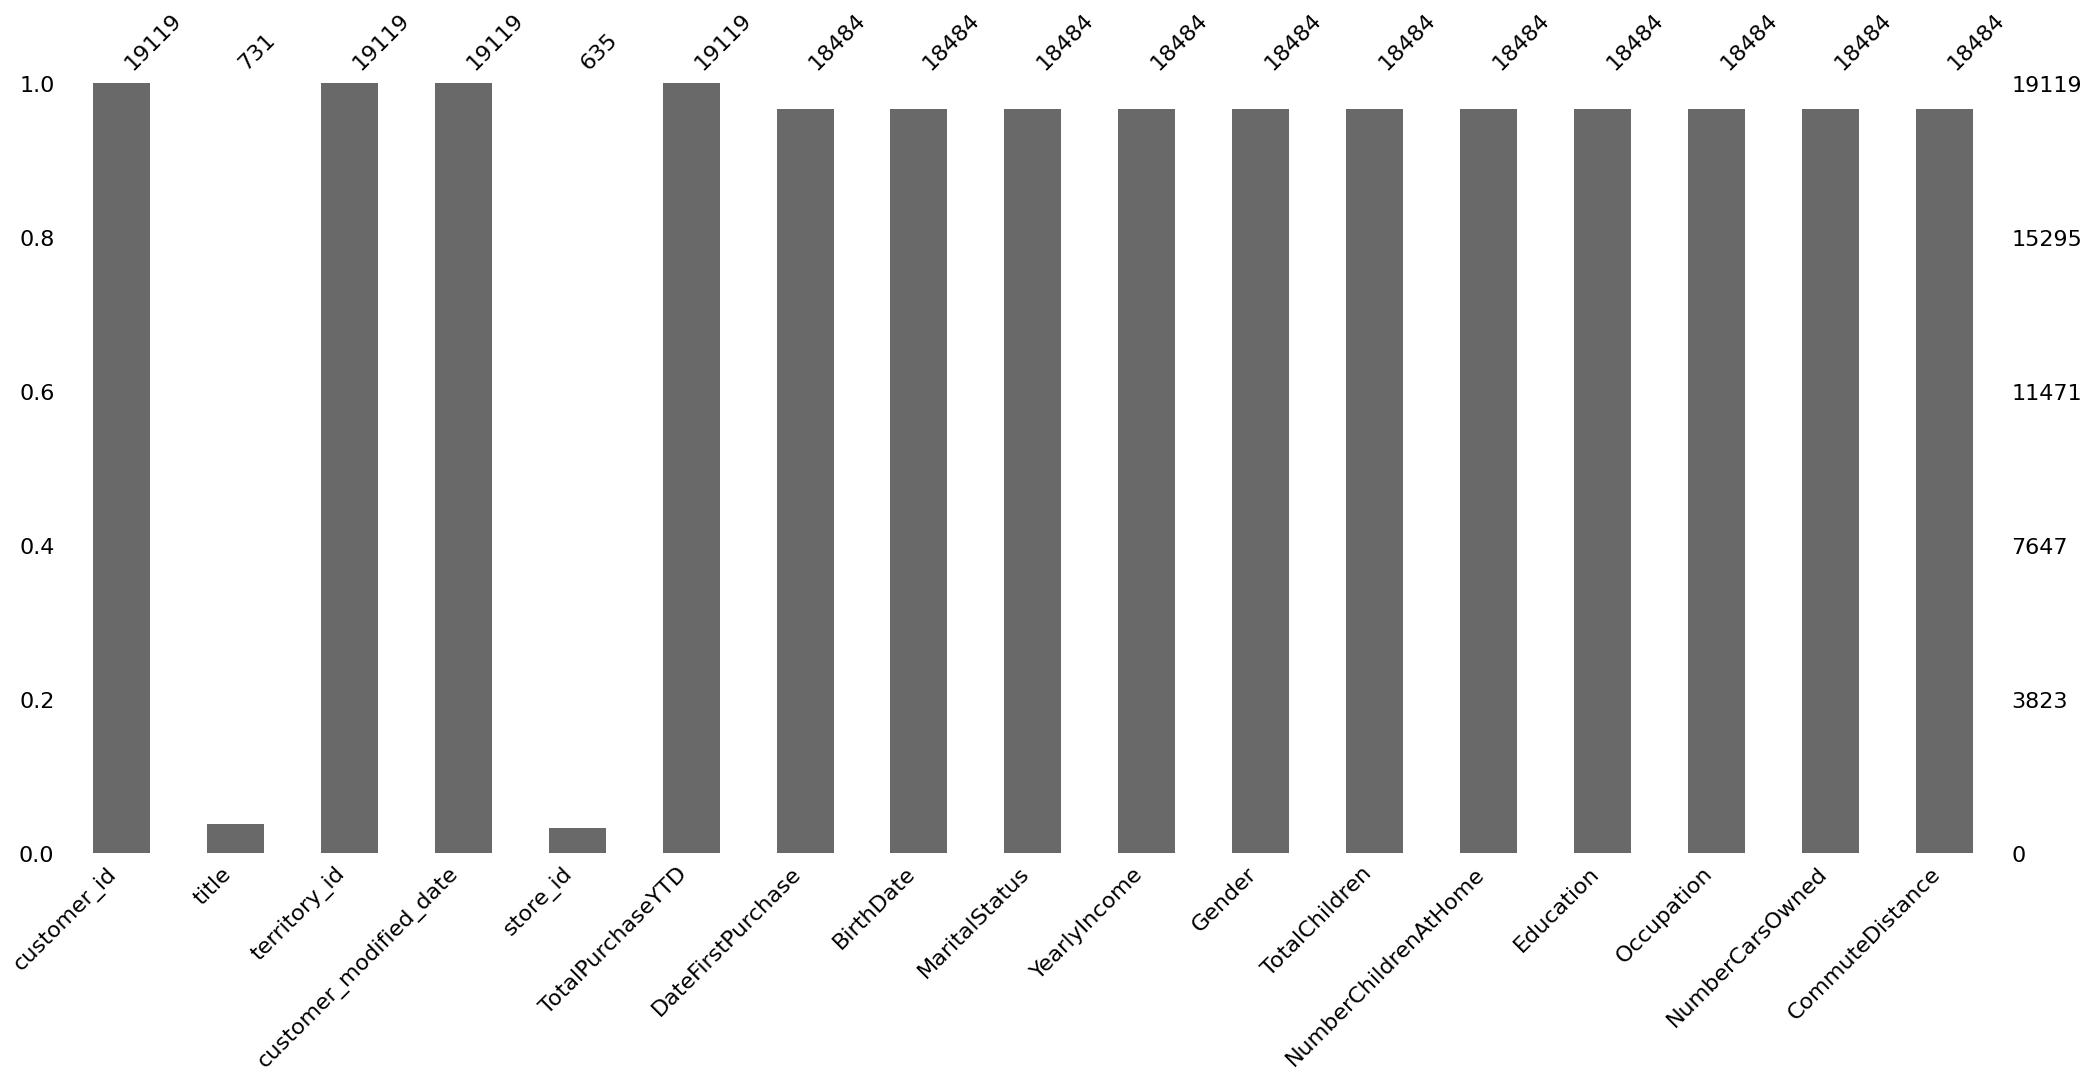

In [31]:
msno.bar(Dim_Sales_Customer_table_df)

In [ ]:
%sql select * from Dim_Sales_Customer

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


In [40]:
%%sql

SELECT
    dp.product_id,
    SUM(fs.line_total) AS Sales_By_Each_Product
FROM
    Fact_Sales fs
JOIN
    Dim_Product dp ON fs.product_SK = dp.product_SK
GROUP BY
    dp.product_id;



 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.


product_id,Sales_By_Each_Product
707,157610.902392
708,160586.906836
709,6060.388200
710,513.000000
711,165224.938549
712,51146.461623
713,21445.710000
714,115191.534176
715,198207.007760
716,95495.835480


In [47]:
%%sql
result_1 << SELECT
    dp.product_category_name,
    dt.year,
    SUM(fs.line_total) AS total_line_total
FROM
    Fact_Sales fs
JOIN
    Dim_Product dp ON fs.product_SK = dp.product_SK
JOIN
    Dim_Time dt ON fs.time_id = dt.time_id
GROUP BY
    dp.product_category_name, dt.year;

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.
Returning data to local variable result_1


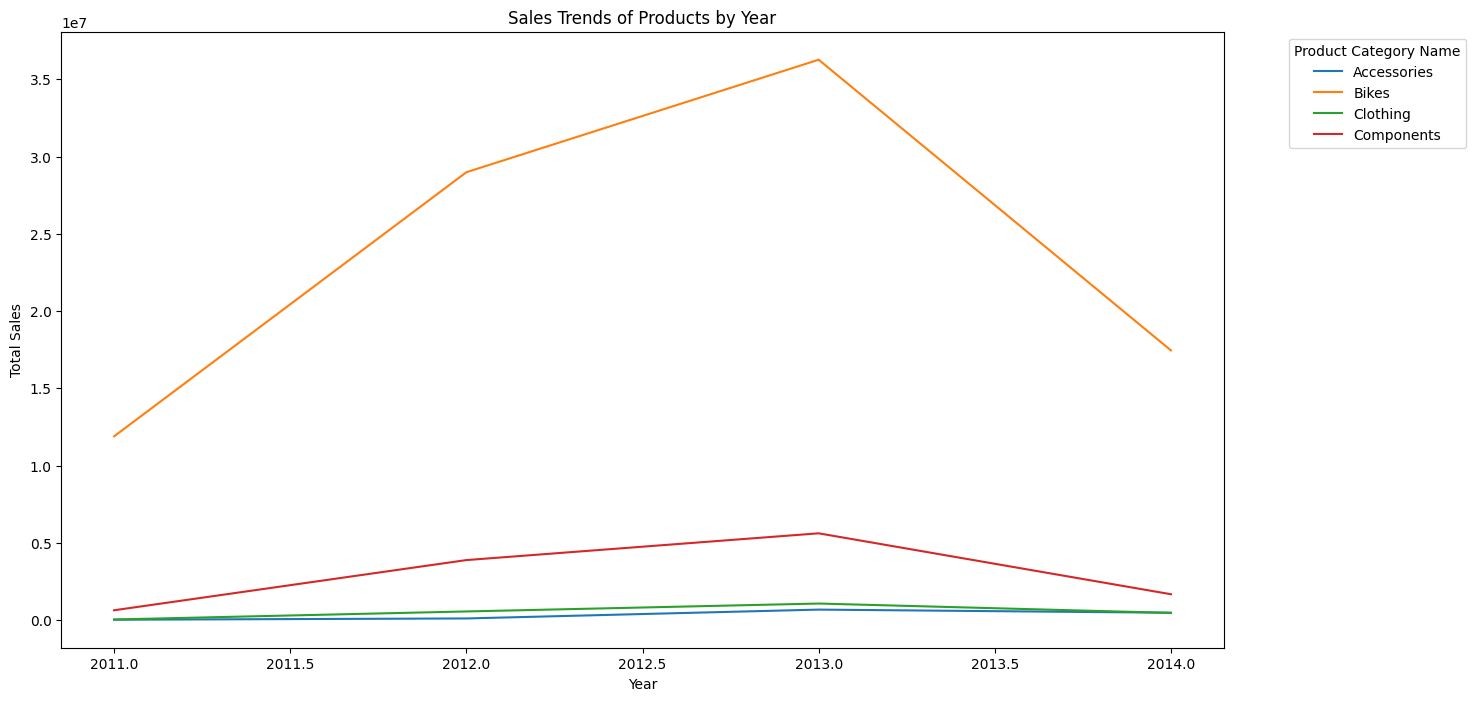

In [49]:
df_result = result_1.DataFrame()
# Pivot the DataFrame for better visualization
df_pivot = df_result.pivot(index='year', columns='product_category_name', values='total_line_total')

# Plotting the sales trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_pivot, dashes=False)
plt.title('Sales Trends of Products by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

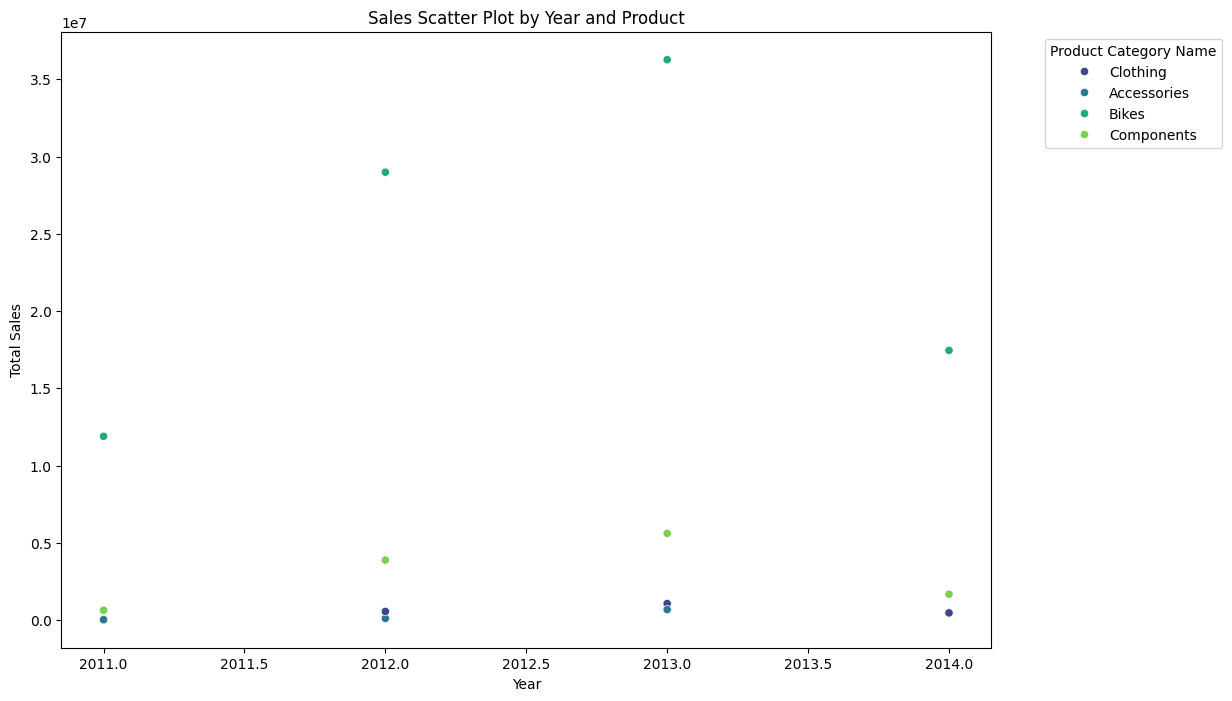

In [50]:
# Plotting the scatter plot with hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_result, x='year', y='total_line_total', hue='product_category_name', palette='viridis', legend='full')
plt.title('Sales Scatter Plot by Year and Product')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [51]:
%%sql
result_2 << SELECT
    dp.product_subcategory_name,
    dt.year,
    SUM(fs.line_total) AS total_line_total
FROM
    Fact_Sales fs
JOIN
    Dim_Product dp ON fs.product_SK = dp.product_SK
JOIN
    Dim_Time dt ON fs.time_id = dt.time_id
GROUP BY
    dp.product_subcategory_name, dt.year;

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.
Returning data to local variable result_2


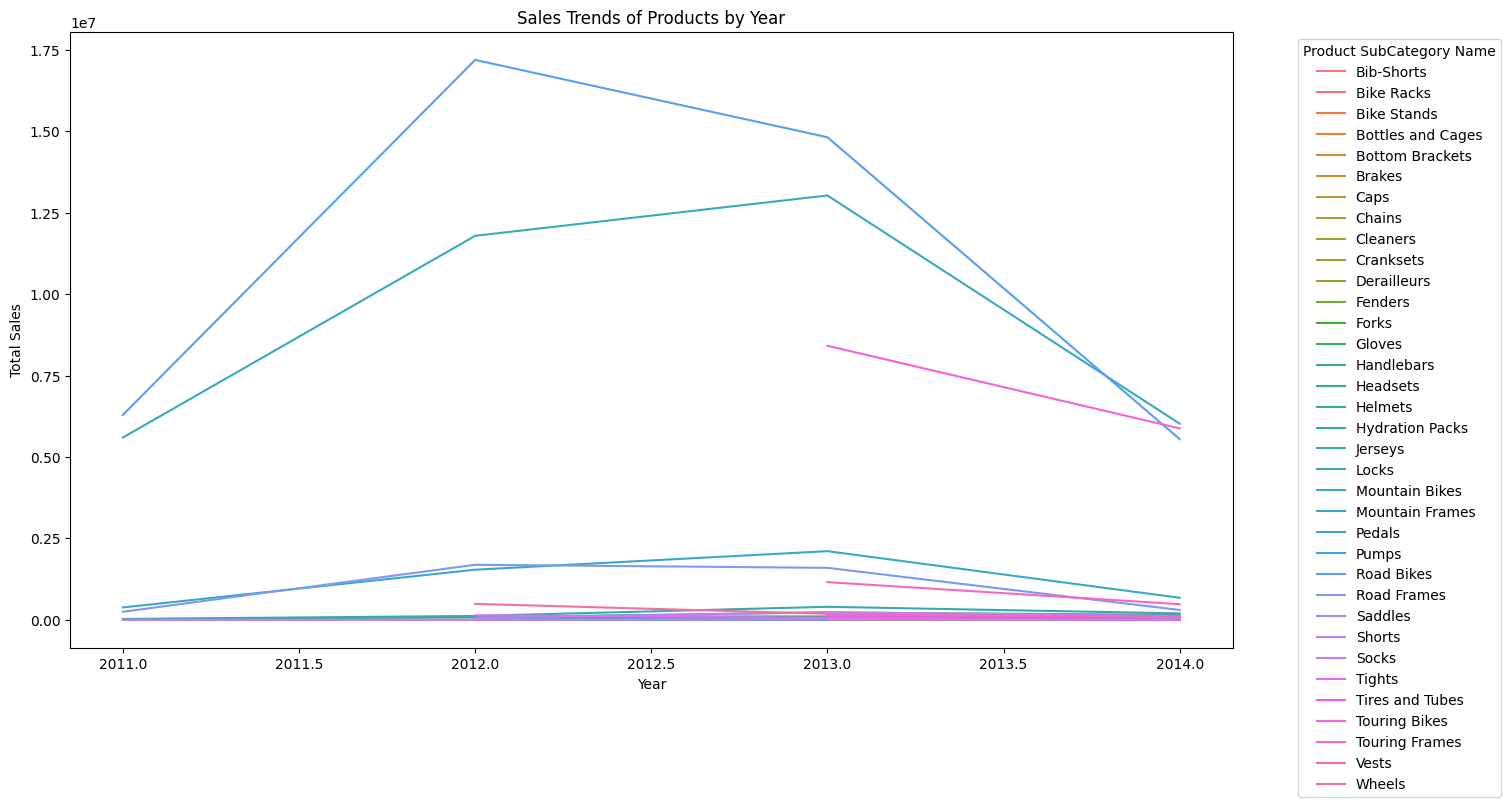

In [52]:
df_result_2 = result_2.DataFrame()
# Pivot the DataFrame for better visualization
df_pivot = df_result_2.pivot(index='year', columns='product_subcategory_name', values='total_line_total')

# Plotting the sales trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_pivot, dashes=False)
plt.title('Sales Trends of Products by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product SubCategory Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [53]:
%%sql
result_3 << SELECT
    dp.product_line,
    dt.year,
    SUM(fs.line_total) AS total_line_total
FROM
    Fact_Sales fs
JOIN
    Dim_Product dp ON fs.product_SK = dp.product_SK
JOIN
    Dim_Time dt ON fs.time_id = dt.time_id
GROUP BY
    dp.product_line, dt.year;

 * mssql+pyodbc://LAPTOP-TTQSKC0J\MSSQLSERVER01/DataWarehouse?driver=SQL+Server&trusted_connection=yes
Done.
Returning data to local variable result_3


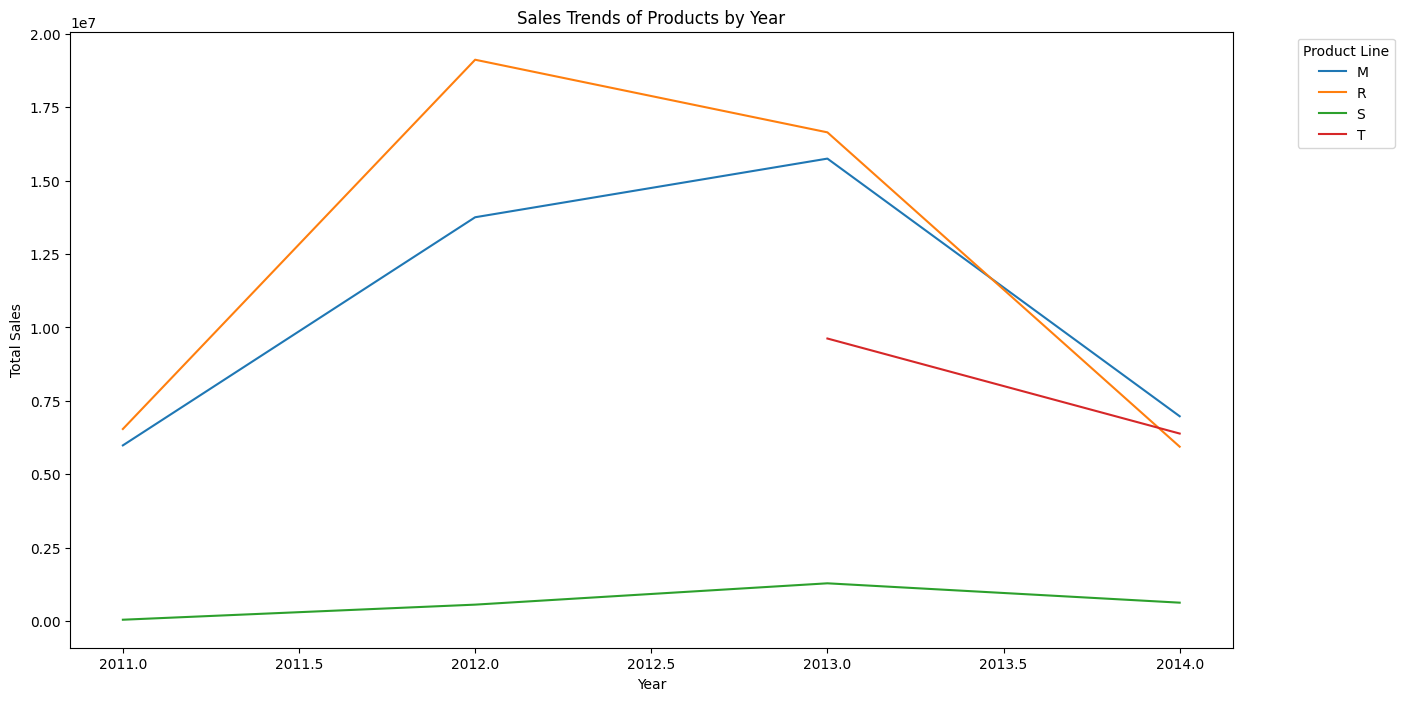

In [54]:
df_result_3 = result_3.DataFrame()
# Pivot the DataFrame for better visualization
df_pivot = df_result_3.pivot(index='year', columns='product_line', values='total_line_total')

# Plotting the sales trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_pivot, dashes=False)
plt.title('Sales Trends of Products by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()